In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import time
import random
from sklearn.preprocessing import LabelEncoder


random.seed(100)

In [ ]:
# Red Wine

In [61]:
red = pd.read_csv('winequality-red.csv',sep=';')

In [62]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [63]:
red.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

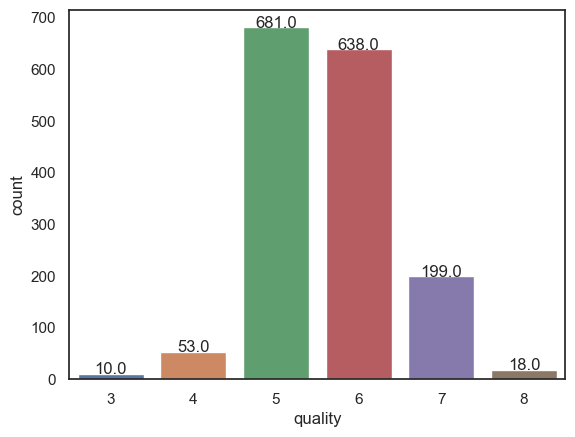

In [65]:
ax = sns.countplot(data=red, x=red['quality'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

In [15]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

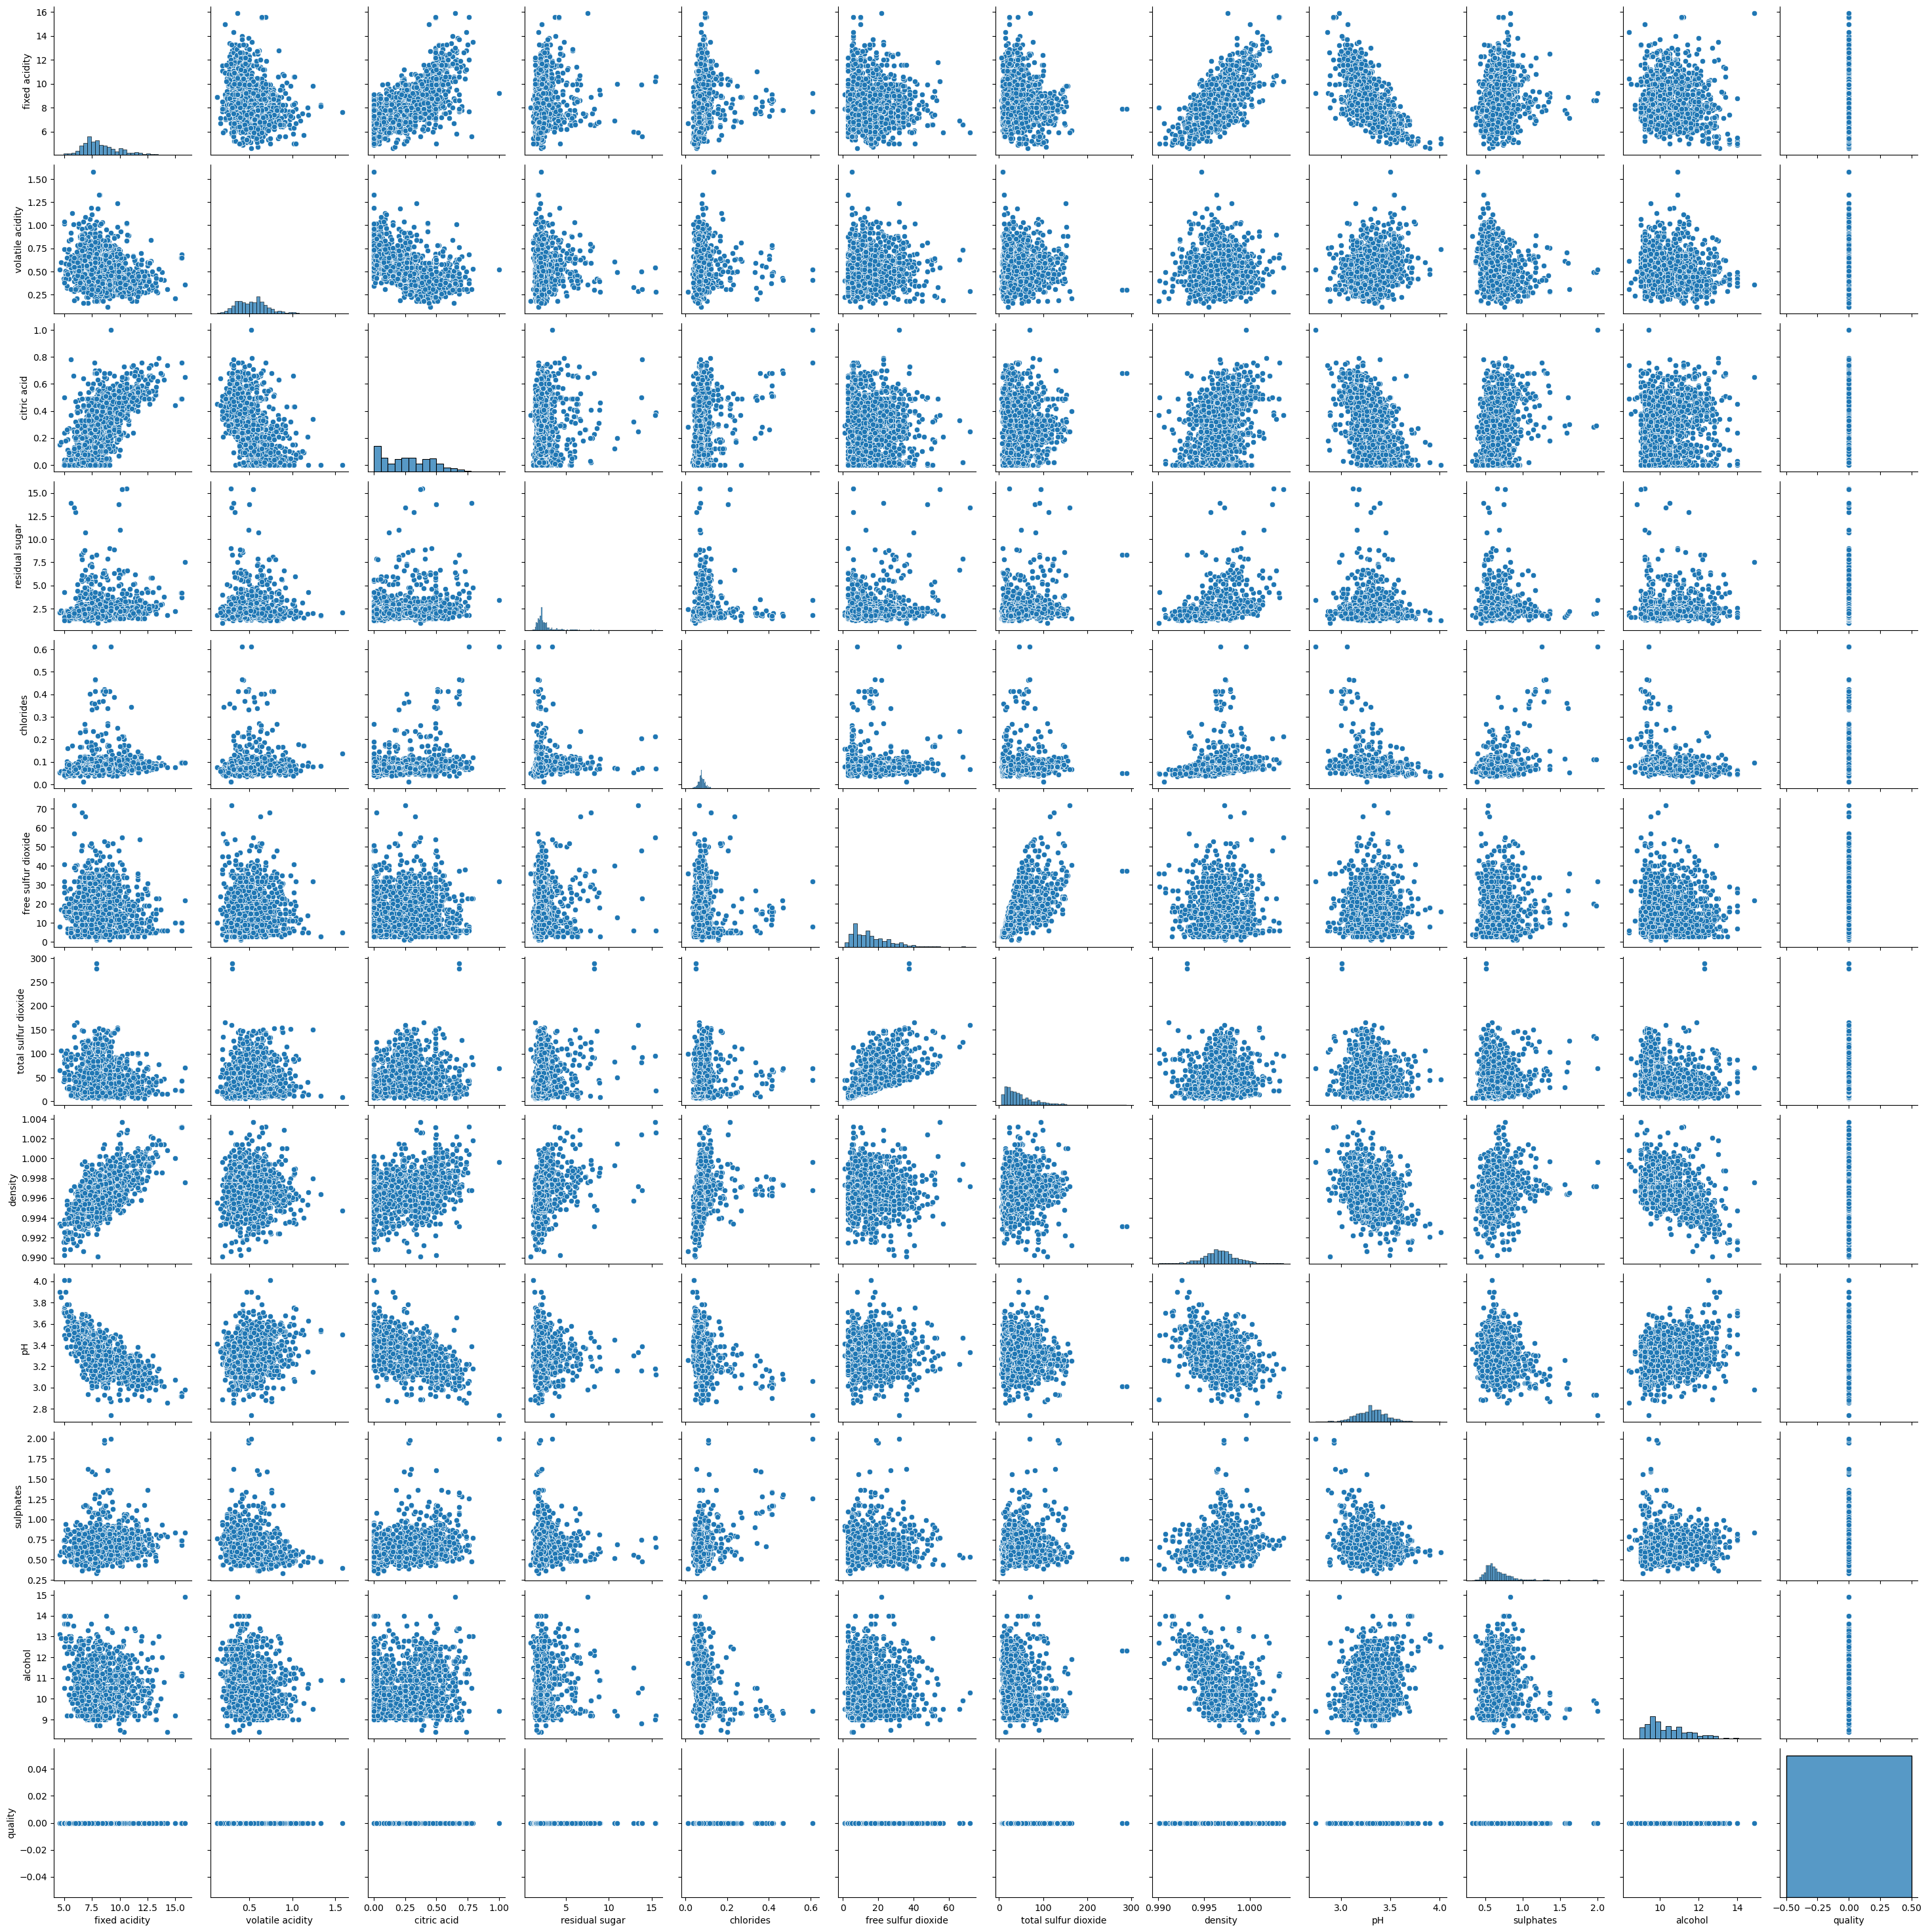

In [21]:
sns.pairplot(red)

In [32]:
red[red.columns[:11]].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [82]:
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

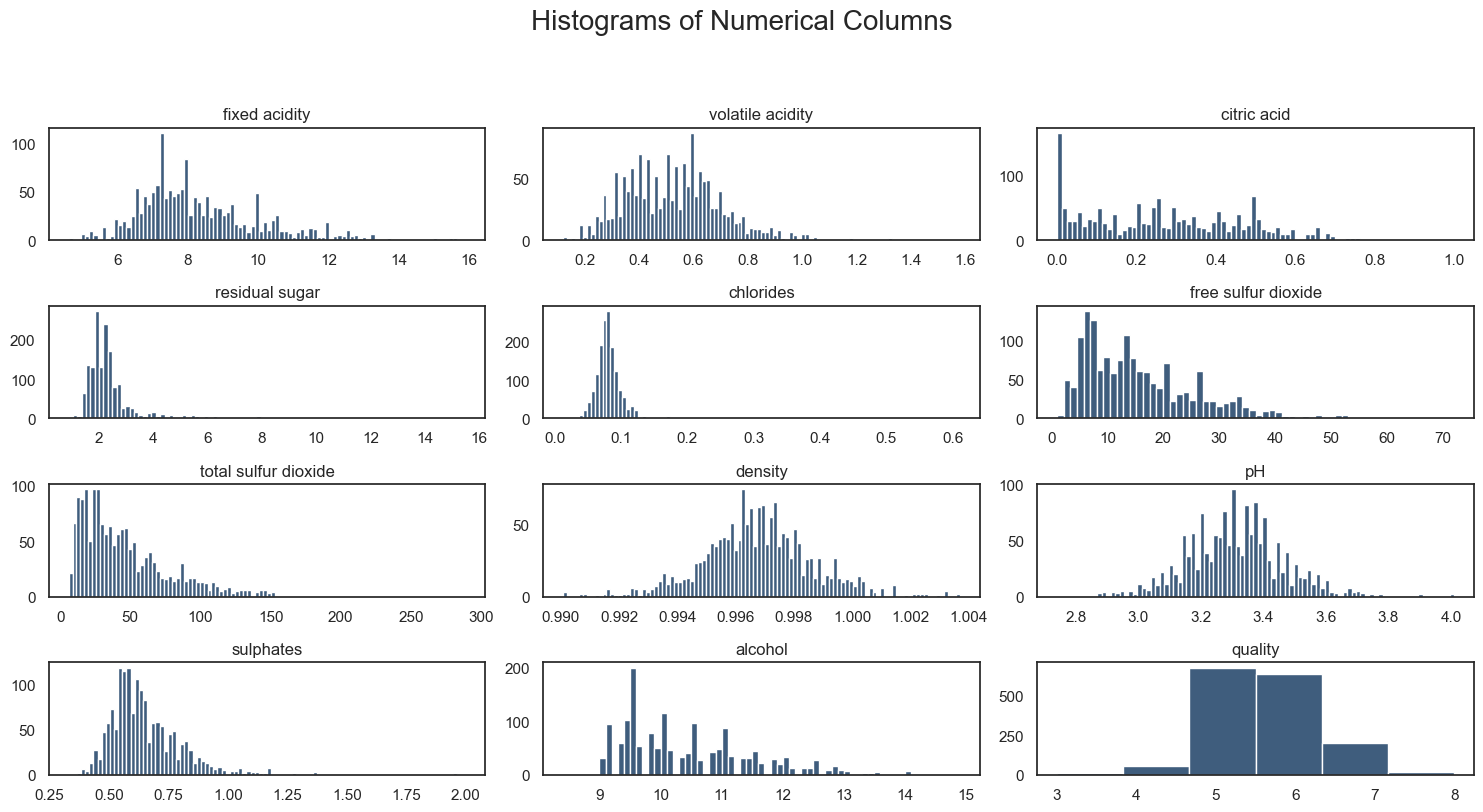

In [72]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(red.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(red.columns.values[i])

    vals = np.size(red.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(red.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [34]:
red.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: title={'center': 'Correlation with quality'}>

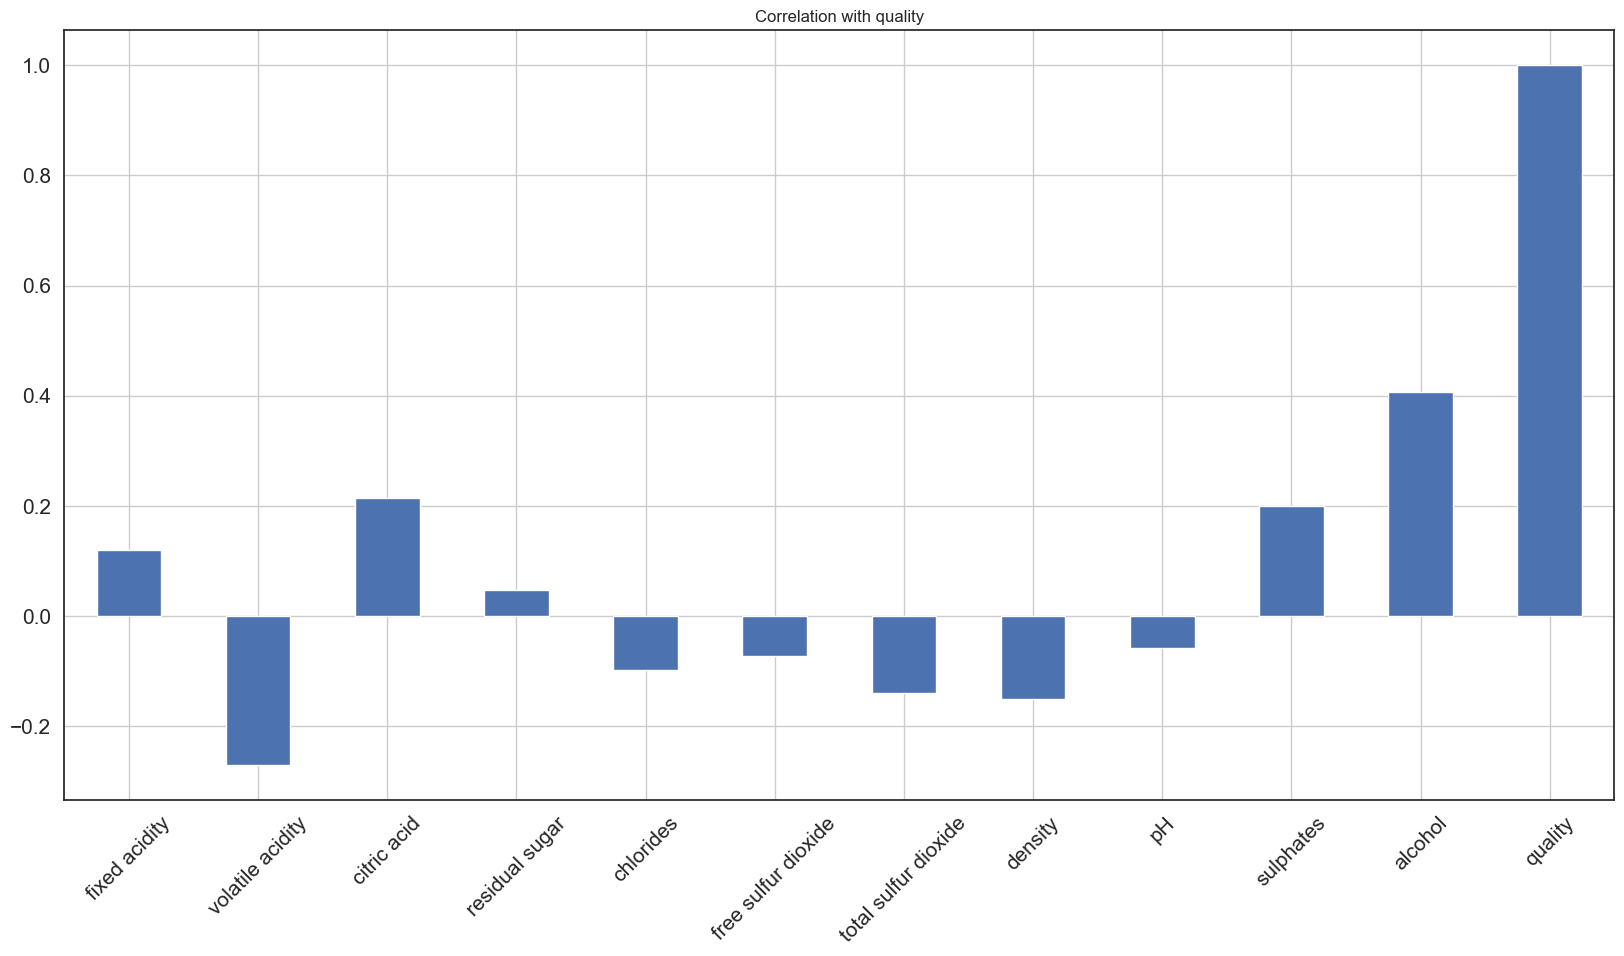

In [39]:
#Correlation with Quality with respect to attributes
red.corrwith(red.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [80]:
sns.set(style="white")

corr = red.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

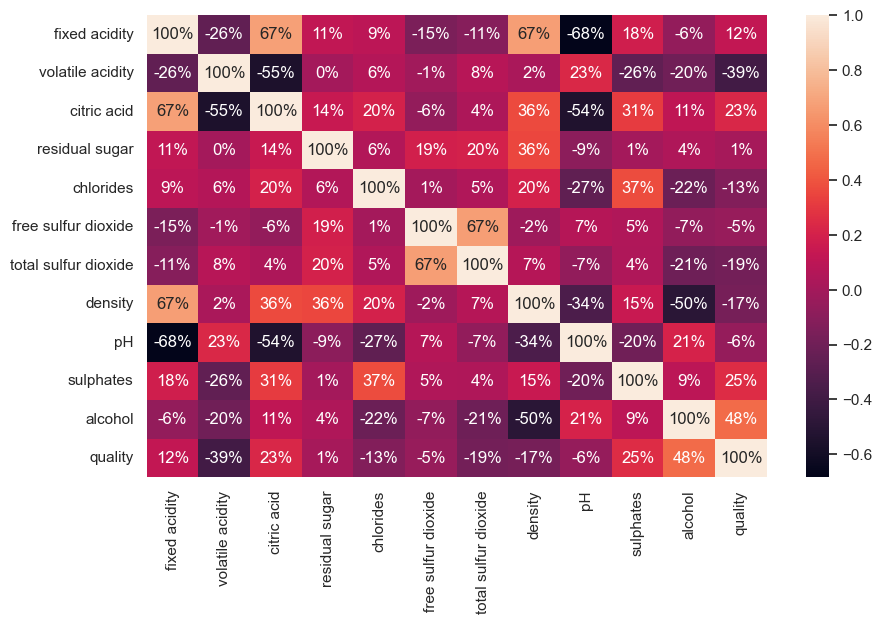

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, fmt='.0%')

# White Wine

In [48]:
white = pd.read_csv('winequality-white.csv',sep=';')

In [49]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [51]:
white.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.129448          0.381227     0.304233        4.628221   
5             6.933974          0.302011     0.337653        7.334969   
6             6.837671          0.260564     0.338025        6.441606   
7             6.734716          0.262767     0.325625        5.186477   
8             6.657143          0.277400     0.326514        5.671429   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050098            23.358896            125.279141  0.994277   
5         0.051546            36.432052            150.904598  0.995263   
6         0.045217            35.650591            137.047316  0.993961   
7         0.038191            34.125568            125.114773  0.992452   
8         0.038314            36.720000            126.165714  0.992236   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.187500   0.474500  10.345000  
4        3.182883   0.476135  10.152454  
5        3.168833   0.482203   9.808840  
6        3.188599   0.491106  10.575372  
7        3.213898   0.503102  11.367936  
8        3.218686   0.486229  11.636000  
9        3.308000   0.466000  12.180000

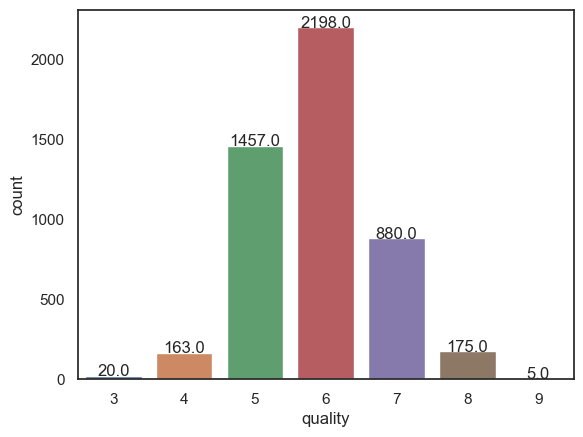

In [57]:
ax = sns.countplot(data=white, x=white['quality'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

In [66]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

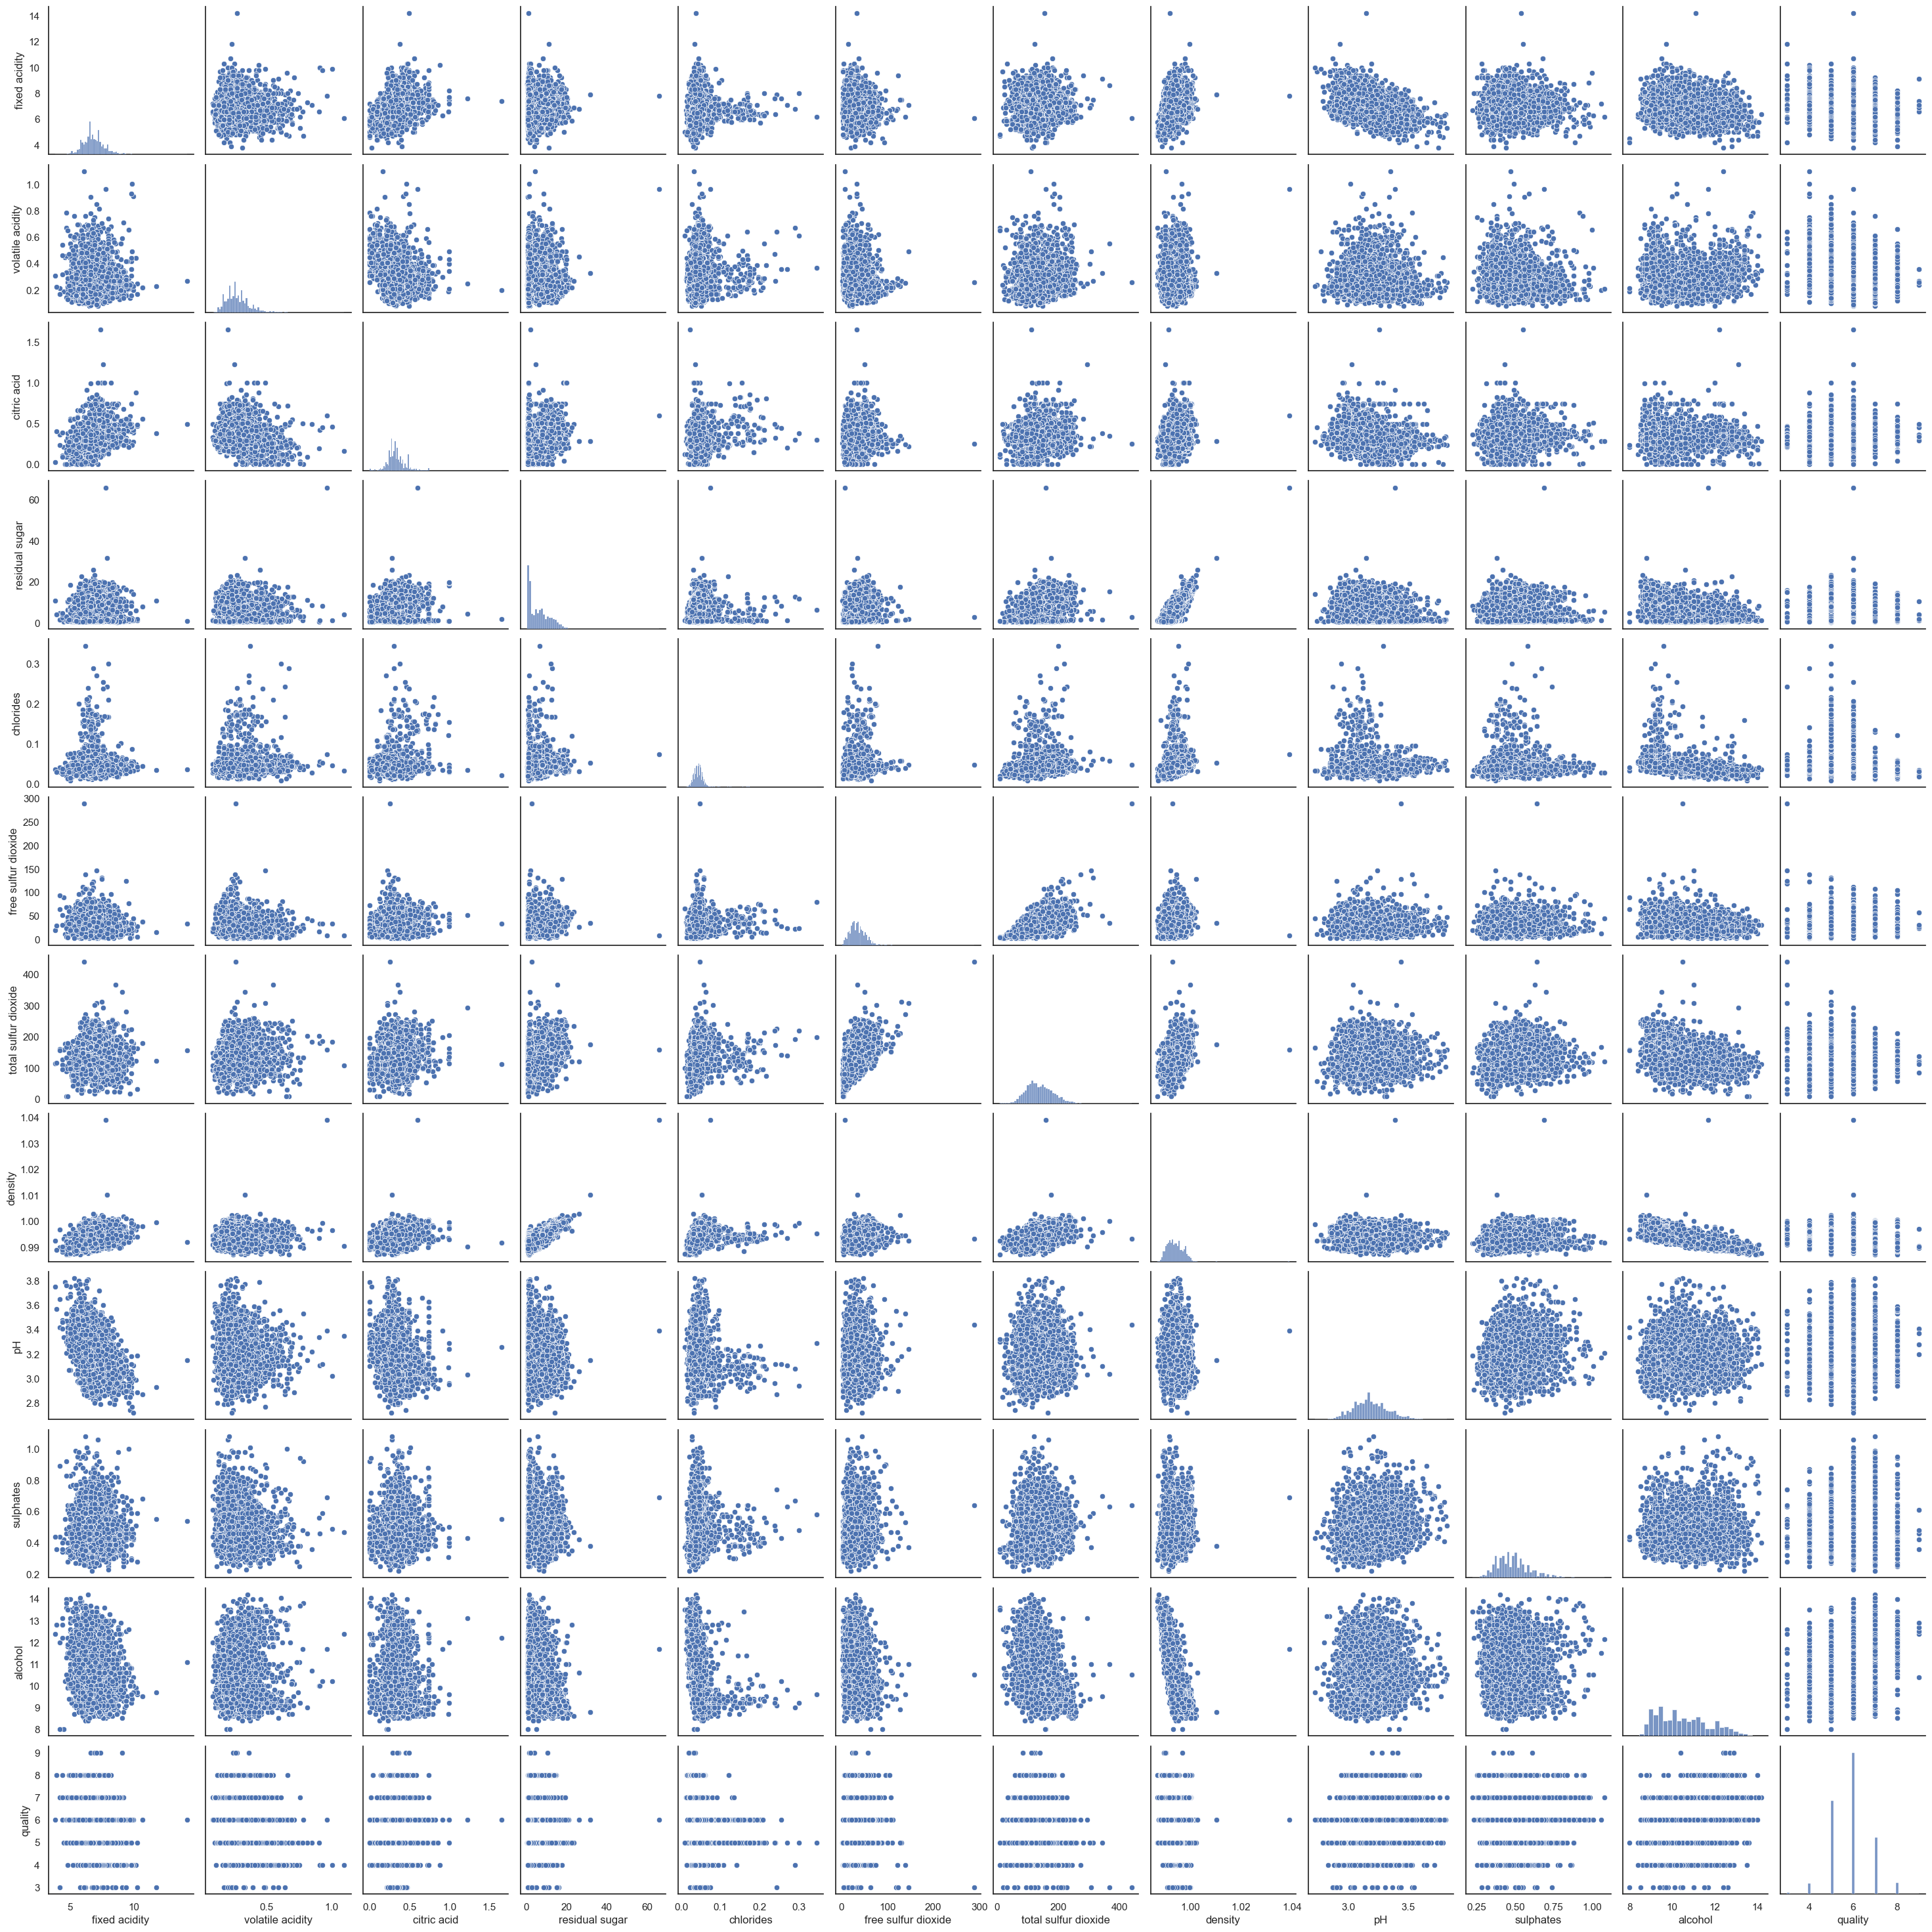

In [69]:
sns.pairplot(white)

In [70]:
white[white.columns[:11]].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

In [81]:
white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

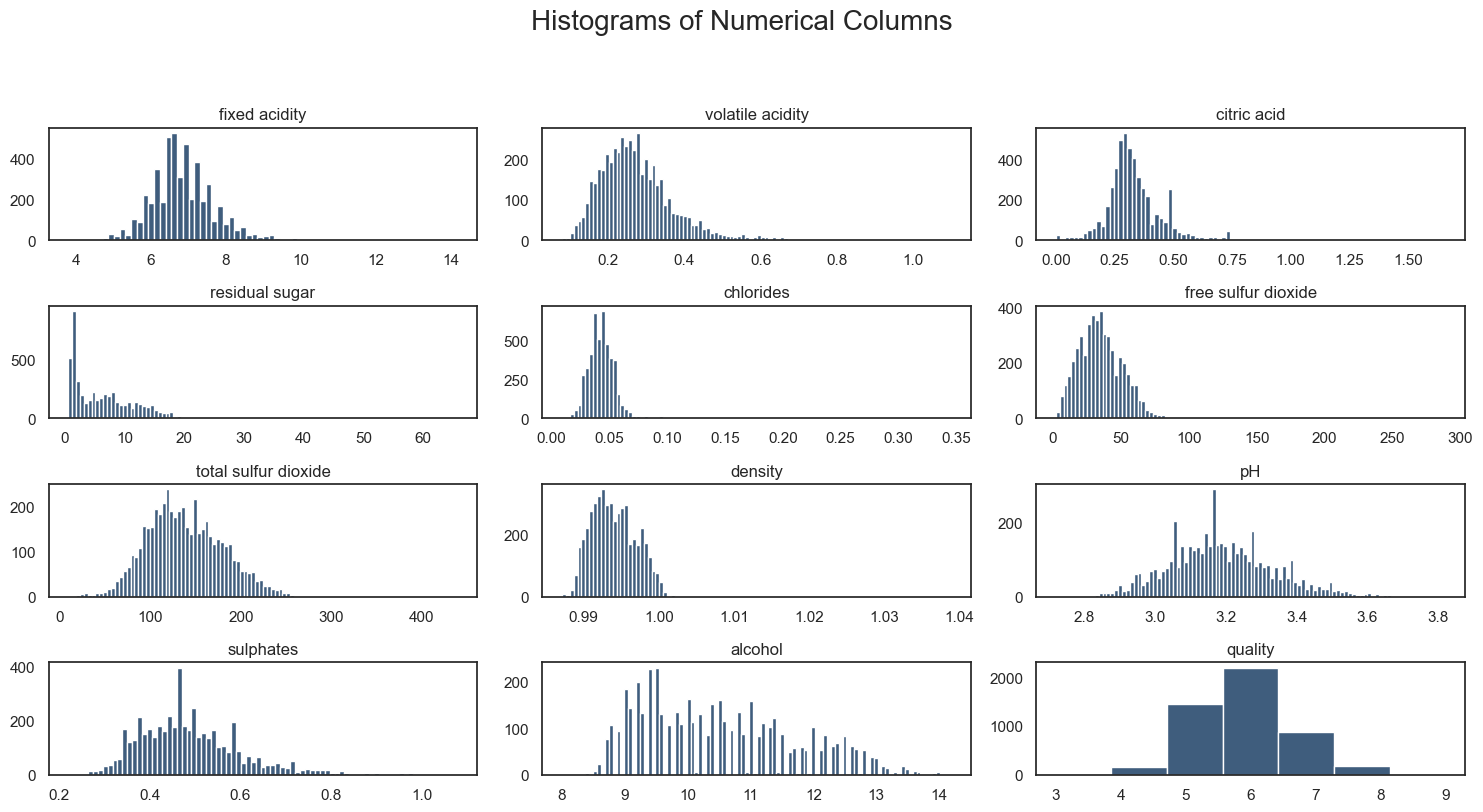

In [71]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(white.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(white.columns.values[i])

    vals = np.size(white.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(white.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [73]:
white.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: title={'center': 'Correlation with quality'}>

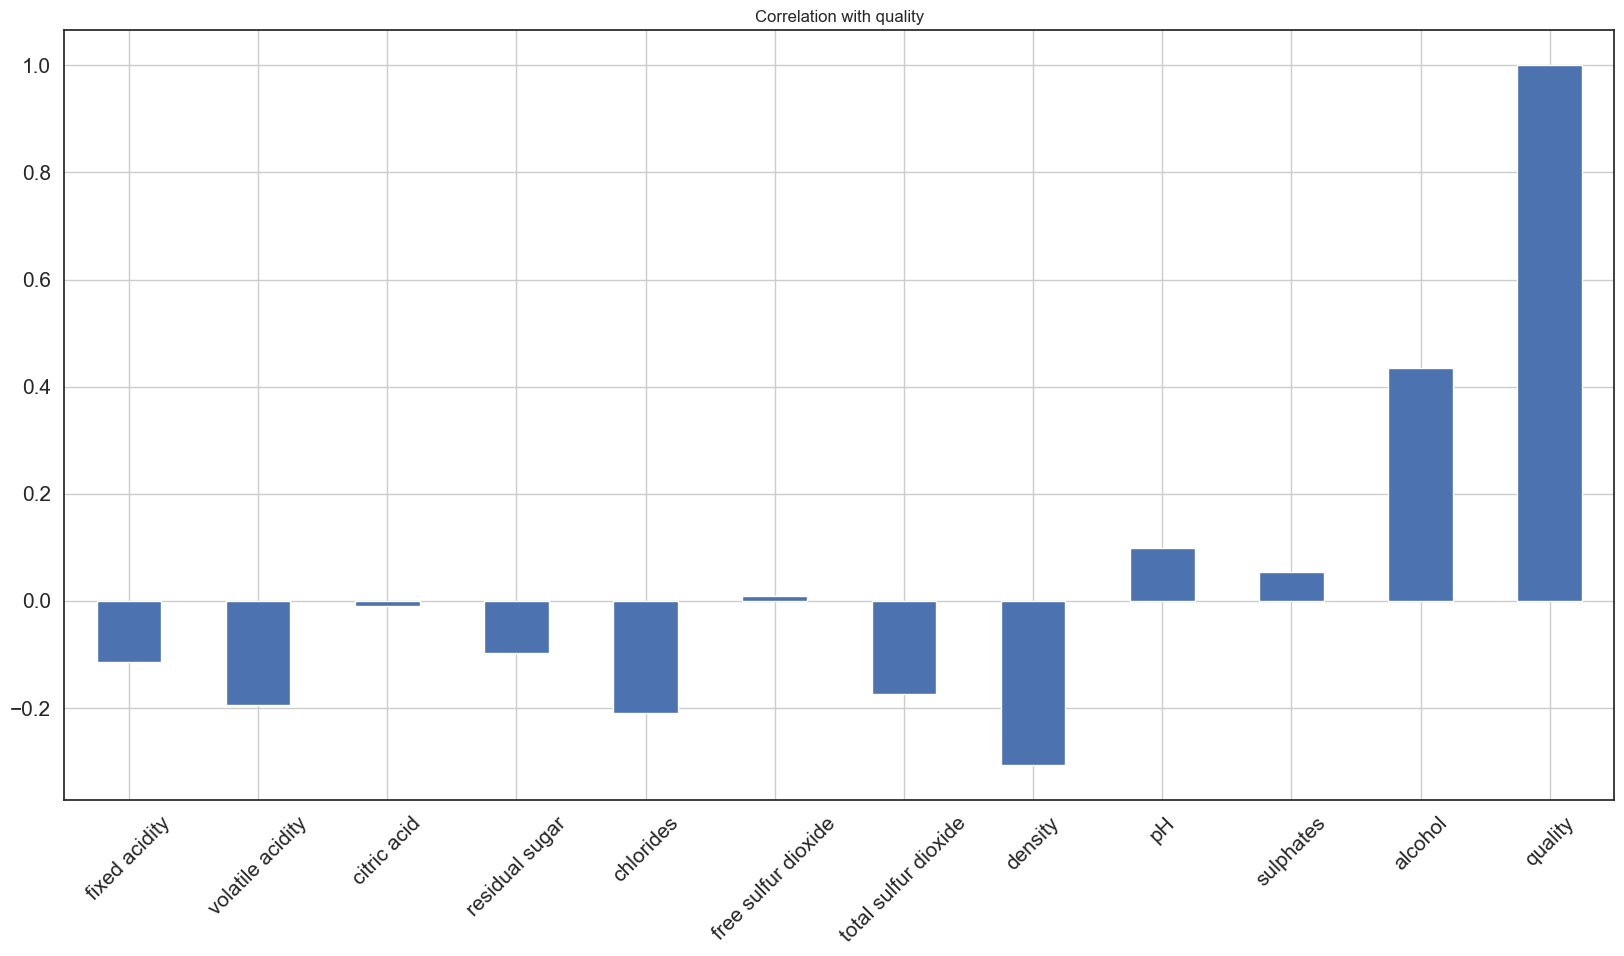

In [74]:
white.corrwith(white.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [79]:
sns.set(style="white")

corr = white.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

<Axes: >

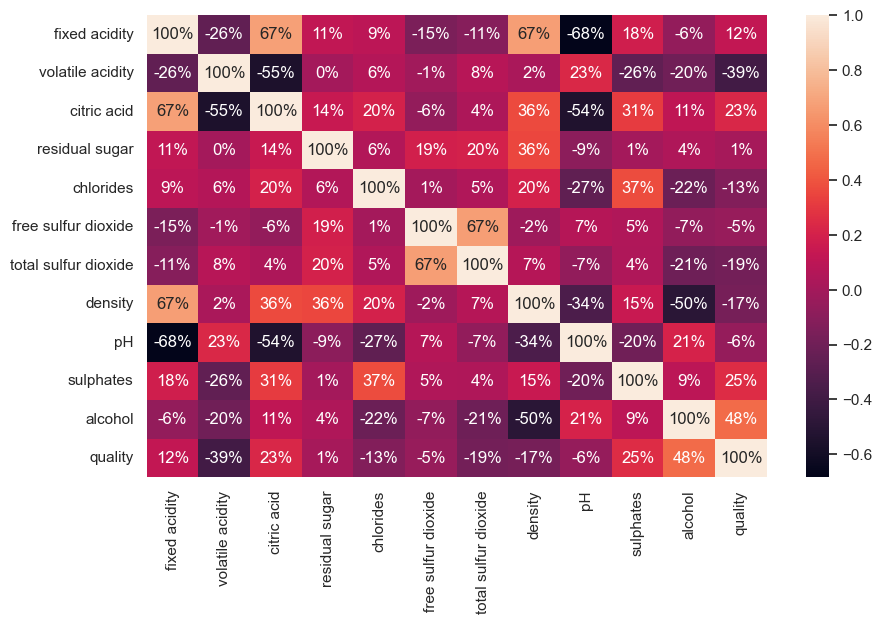

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, fmt='.0%')

# Decision Tree & Random Forest Red Wine

In [84]:
red['goodquality'] = [1 if x >= 7 else 0 for x in red['quality']]
X = red.drop(['quality','goodquality'], axis = 1)
Y = red['goodquality']

In [85]:
red['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [86]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [87]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [89]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8645833333333334


In [90]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.89375


# Decision Tree & Random Forest White Wine

In [92]:
white['goodquality'] = [1 if x >= 7 else 0 for x in white['quality']]
X = white.drop(['quality','goodquality'], axis = 1)
Y = white['goodquality']

In [93]:
white['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [94]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [95]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: goodquality, Length: 4898, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8414965986394558


In [98]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.8768707482993198
